In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_data_dir = r'D:\B190358508\DL\DL LP-4\Datasets\mnist-jpg\mnist-jpg\train'
test_data_dir = r'D:\B190358508\DL\DL LP-4\Datasets\mnist-jpg\mnist-jpg\test'

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_batch_size = 10000
train_generator = train_datagen.flow_from_directory(
 train_data_dir,
 target_size=(28, 28),
 batch_size=train_batch_size,
 class_mode='categorical',
 color_mode='grayscale',
 shuffle=True,
)

test_batch_size = 2000
test_generator = test_datagen.flow_from_directory(
 test_data_dir,
 target_size=(28, 28),
 batch_size=test_batch_size,
 class_mode='categorical', 
 color_mode='grayscale',
 shuffle=True,
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [16]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(10000, 28, 28, 1) (10000, 10)
(2000, 28, 28, 1) (2000, 10)


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=5, batch_size=64,
         validation_data=(x_test, y_test))

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7285 - loss: 0.9036 - val_accuracy: 0.9220 - val_loss: 0.2846
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9326 - loss: 0.2399 - val_accuracy: 0.9505 - val_loss: 0.1727
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9538 - loss: 0.1652 - val_accuracy: 0.9580 - val_loss: 0.1514
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9674 - loss: 0.1138 - val_accuracy: 0.9595 - val_loss: 0.1340
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9736 - loss: 0.0915 - val_accuracy: 0.9670 - val_loss: 0.1190


In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9680 - loss: 0.1330
Loss:  0.11895117908716202
Accuracy:  0.9670000076293945


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Actual Number:  1
Predicted Number:  1


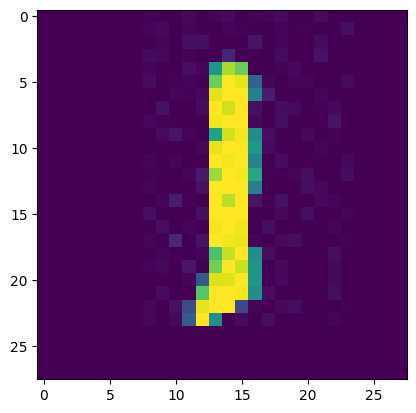

In [21]:
n = 30
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Actual Number: ", np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))